## Problem Statement
The goal is to predict whether a student passes or fails based on
study hours and attendance.


In [2]:
import pandas as pd
dataset = pd.read_csv("student_pass_fail.csv")
dataset.head()

,study_hours,attendance,pass
0,1,60,0
1,2,65,0
2,3,70,0
3,4,75,1
4,5,80,1


This dataset contains student study behavior and a binary outcome
indicating pass or fail.


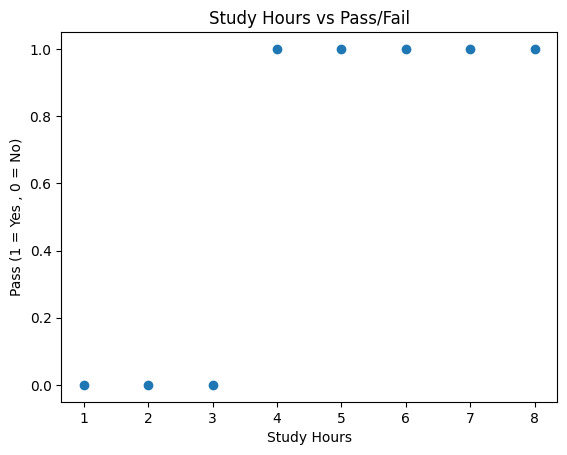

In [4]:
import matplotlib.pyplot as plt

plt.scatter(dataset["study_hours"], dataset["pass"])
plt.xlabel("Study Hours")
plt.ylabel("Pass (1 = Yes , 0 = No)")
plt.title("Study Hours vs Pass/Fail")
plt.show()

As study hours increase, the likelihood of passing increases.

This suggests a classification boundary rather than a regression target.


In [5]:
x = dataset.iloc[:,:-1]
y = dataset["pass"]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Feature scaling is applied because logistic regression is sensitive
to feature magnitude.


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)

y_pred, y_prob

(array([0, 1]),
 array([[0.66227655, 0.33772345],
        [0.13525005, 0.86474995]]))

Logistic regression outputs probabilities, which are converted into
class predictions using a decision threshold.


In [11]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Accuracy provides an initial evaluation, but it may be misleading
for imbalanced datasets.


In [12]:
coeff_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_[0]
})
coeff_df


,Feature,Coefficient
0,study_hours,0.745046
1,attendance,0.745046


Positive coefficients indicate features that increase the probability
of passing, while negative values decrease it.


# CONCLUSION
Logistic regression is suitable for binary classification problems.
    
Instead of predicting numeric values, it estimates probabilities and
makes decisions based on a threshold.
